In [1]:
import pandas as pd
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
from datetime import datetime
from skimage.measure import regionprops
from utility import adjacency_matrix_generator

In [2]:
num_labels = 20

In [3]:
df = pd.read_csv('./gridsat.path.ibtr.windspeed.csv')

In [4]:
# df['PATH'] = df['PATH'].map(lambda x: x.replace('/home/ices/work/typhoon_intensity/data/GridSat_B1_new_npy', '../GridSat_B1_new_npy'))

In [5]:
paths = df['PATH'].to_numpy()

In [6]:
paths[0]

'/home/ices/work/typhoon_intensity_extension/data/GridSat_B1_new_npy/2010002S09096/2010002S09096.201001011200.npy'

In [7]:
for path in tqdm(paths):
    # print(path)
    img = np.load(path)[0]
    prefix = path.replace('GridSat_B1_new_npy', 'GridSat_B1_new_kmean{}/cluster'.format(num_labels))
    adj_prefix = path.replace('GridSat_B1_new_npy', 'GridSat_B1_new_kmean{}/adj'.format(num_labels))
    suffix = '.kmean{}.pkl'.format(num_labels)
    cluster_name = prefix.replace('.npy', suffix)
    end = datetime.now()
    with open(cluster_name, 'rb') as f: 
        # 注意: 使用pickle必须包含 'b'
        items = pickle.load(f)
    labels = items['labels']
    centroids = items['centers']
    nodes = []
    adj_name = adj_prefix.replace('.npy','.adj.pkl')
    for _label in np.unique(labels):
        cluster_block = (labels == 0).astype(int)

        # 提取特征
        properties = regionprops(cluster_block)

        # 提取几何特征
        area = properties[0].area
        perimeter = properties[0].perimeter
        filled_area = properties[0].filled_area
        orientation = properties[0].orientation  # 新增：提取方位特征
        centroid = centroids[_label,0]

        node_attribute = np.array([
            centroid, area, perimeter, filled_area, orientation
        ])
        nodes.append(node_attribute)
    nodes = np.stack(nodes)
    
    adj, final_adj = adjacency_matrix_generator(labels, num_labels)
    
    item = {
        "attribute":nodes,
        "adj":adj,
        "final_adj":final_adj,
    }
    # with open(adj_name, 'wb') as f: 
    #     # 注意: 使用pickle必须包含 'b'
    #     pickle.dump(item, f)
    # break

  0%|                                                                                       | 0/55316 [00:00<?, ?it/s]


In [8]:
nodes.shape

(20, 5)

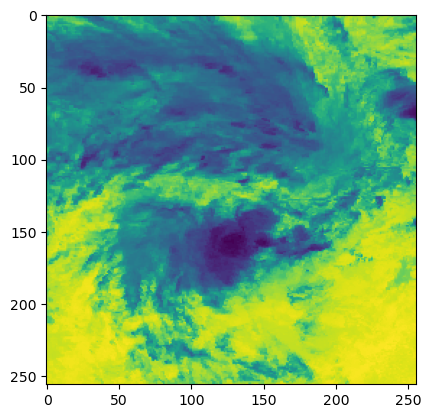

In [9]:
plt.imshow(img)

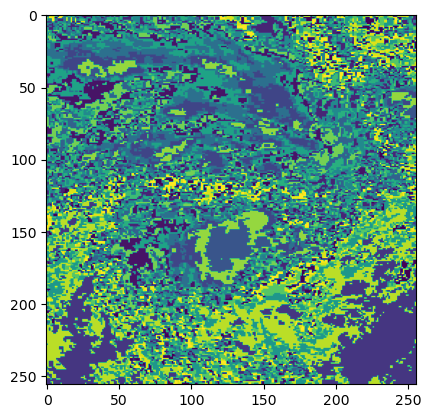

In [10]:
plt.imshow(labels)

In [12]:
centroids[_label,0]

268.94464